In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/train_df.csv')


In [3]:
df.shape

(1460, 78)

In [4]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   Id             1460 non-null   int64  
 2   MSSubClass     1460 non-null   int64  
 3   MSZoning       1460 non-null   object 
 4   LotFrontage    1460 non-null   float64
 5   LotArea        1460 non-null   int64  
 6   Street         1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

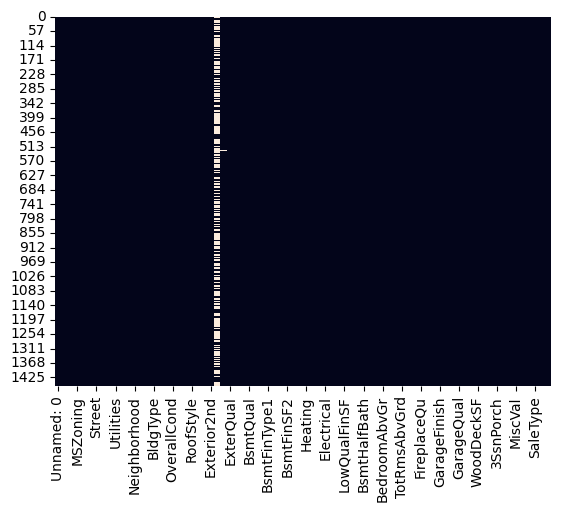

In [5]:
df.head()
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False).head(10)
sns.heatmap(df.isnull(), cbar=False)


In [6]:
# Fill numeric columns with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Drop columns with too many missing values
# The following columns were causing a KeyError as they were not present in the dataframe:
# ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
# Removing them from the drop list.
df = df.drop([], axis=1) # Empty list as the problematic columns are removed.

# Fill categorical with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
df = pd.get_dummies(df, drop_first=True)


In [8]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [12]:
def evaluate_model(name, y_test, pred):
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R² Score: {r2:.2f}\n")

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)


Linear Regression RMSE: 52236.74
Linear Regression R² Score: 0.64

Random Forest RMSE: 29025.81
Random Forest R² Score: 0.89



In [13]:
import joblib
joblib.dump(rf, 'house_price_model.pkl')


['house_price_model.pkl']

In [14]:
# Load saved model
model = joblib.load('house_price_model.pkl')

# Sample prediction
sample = X_test[0].reshape(1, -1)
predicted_price = model.predict(sample)
print(f"Predicted price: ${predicted_price[0]:,.2f}")


Predicted price: $139,925.00


In [16]:
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath'])
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)


Text(0.5, 1.0, 'Top Correlated Features with SalePrice')

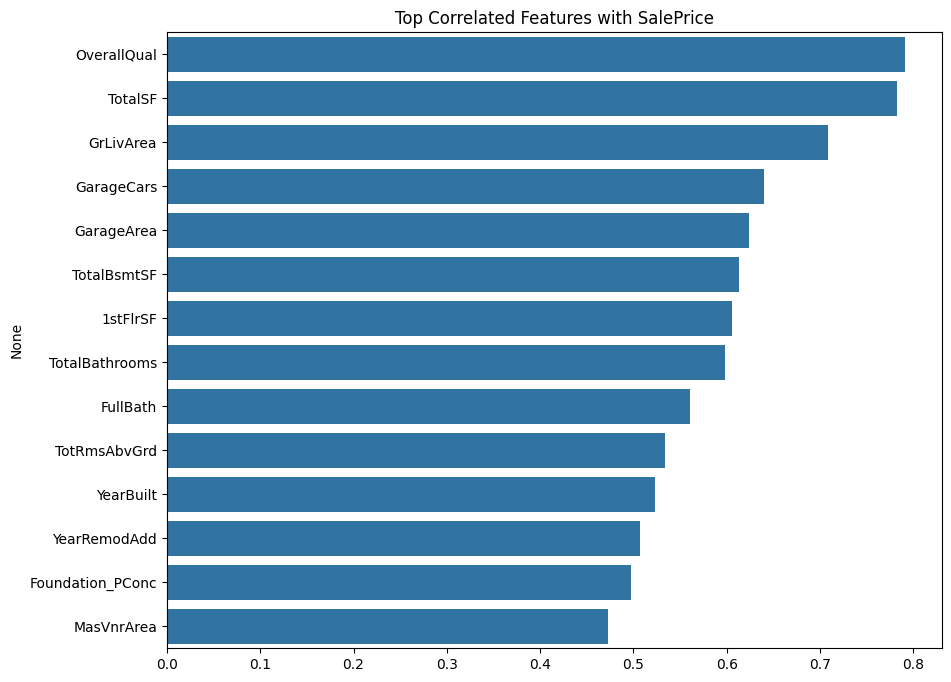

In [17]:
corr = df.corr()
top_corr = corr['SalePrice'].sort_values(ascending=False)[1:15]
plt.figure(figsize=(10, 8))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top Correlated Features with SalePrice")


In [18]:
top_features = list(top_corr.index)
X = df[top_features]


In [19]:
df = df[df['GrLivArea'] < 4500]
df = df[df['SalePrice'] < 700000]


In [20]:
from sklearn.ensemble import StackingRegressor

stacked_model = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=100)),
    ],
    final_estimator=Ridge()
)

stacked_model.fit(X_train, y_train)
stack_pred = stacked_model.predict(X_test)

evaluate_model("Stacked Ensemble", y_test, stack_pred)


Stacked Ensemble RMSE: 29305.19
Stacked Ensemble R² Score: 0.89



In [21]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
print("Avg RMSE:", -scores.mean())


Avg RMSE: 32519.025090169016


In [22]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.8528363388716406


In [23]:
pip install shap


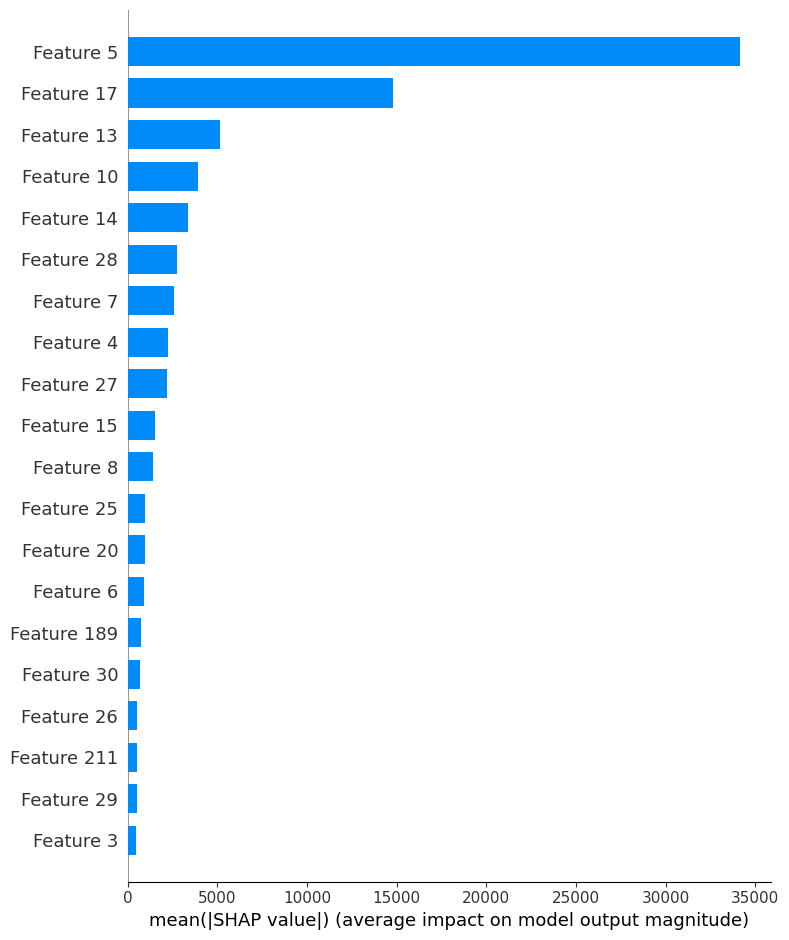

In [24]:
import shap

model = RandomForestRegressor().fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


Text(0.5, 1.0, 'Actual vs Predicted House Prices')

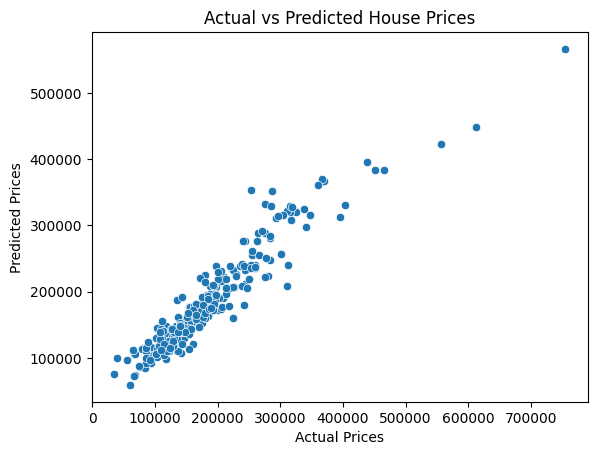

In [15]:
sns.scatterplot(x=y_test, y=rf_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
